# Traffic data

Exploring the dataset to find out which factors are related to heavy traffic westbound on I-94 between two locations.

Dataset description: Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
traffic_volume = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [4]:
traffic_volume.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
traffic_volume.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [6]:
traffic_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


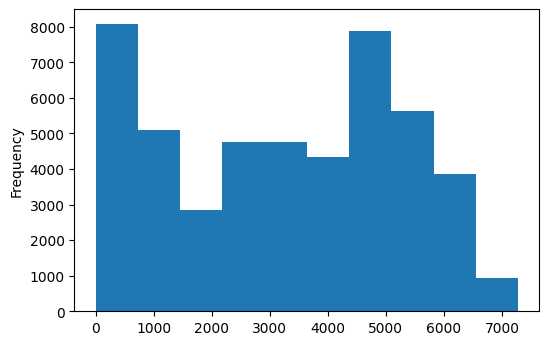

In [7]:
traffic_volume['traffic_volume'].plot.hist()

In [8]:
traffic_volume['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

There are between 0 and ~7300 cars travelling on this stretch. The frequencies of the interval 0-700 cars 4200-4900 cars are higher than the other intervals. Also, 25% of the time sees 1193 cars passing by the monitoring station, but 75% of the time the amount is ~5000 cars or fewer - more than four times the amount. However, the volume is more than that for the remaining 25% of the time. This could be due to the time of the day.

In [9]:
traffic_volume['date_time'] = pd.to_datetime(traffic_volume['date_time'])
traffic_volume['date_time'].dtype

dtype('<M8[ns]')

# Exploring time indicators

Dividing the dataset into two parts based on daytime and nighttime traffic. 
* Day: 0700 - 1900  
* Night: 1900 - 0700

In [10]:
traffic_day = traffic_volume[(traffic_volume['date_time'].dt.hour >= 7) &
                             (traffic_volume['date_time'].dt.hour < 19)]
traffic_day.shape


(23877, 9)

In [11]:
traffic_night = traffic_volume[(traffic_volume['date_time'].dt.hour >= 19) |
                             (traffic_volume['date_time'].dt.hour < 7)]
traffic_night.shape

(24327, 9)

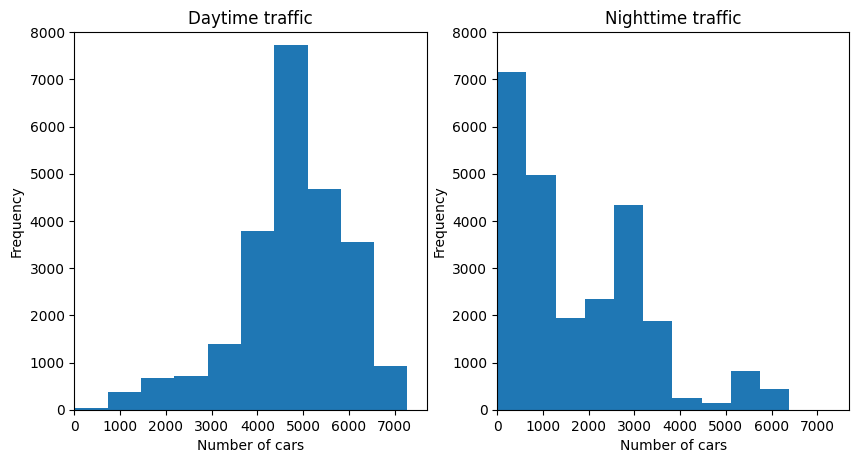

In [13]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
traffic_day['traffic_volume'].plot.hist()
plt.title('Daytime traffic')
plt.xlabel('Number of cars')
plt.xlim(0,7700)
plt.ylim(0,8000)

plt.subplot(1,2,2)
traffic_night['traffic_volume'].plot.hist()
plt.title('Nighttime traffic')
plt.xlabel('Number of cars')
plt.xlim(0,7700)
plt.ylim(0,8000)
plt.show()

The Daytime histogram shows that there are a lot more cars than during nighttime. The maximum traffic volume seem to appear between 4000-6500 groups, whereas there are rarely that amount of cars during the night.

In [18]:
traffic_day.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452
std,13.298885,63.62932,0.008853,37.564588,1174.546482
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000


In [19]:
traffic_night.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441
std,13.296357,1.110872,0.007434,40.048382,1441.951197
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000


The average number of traffic during the day is almost three times as high as during the night. To look for indicators of heavy traffic, it's prudent to continue exploring the daytime trends.

In [14]:
#group the daytime data by month and calculate the mean
traffic_day['month'] = traffic_day['date_time'].dt.month
by_month = traffic_day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-14-1851cc2a475e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

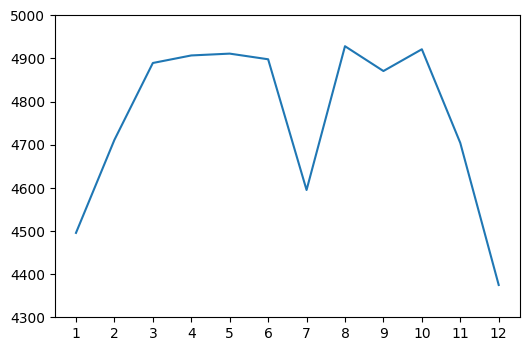

In [18]:
plt.plot(by_month['traffic_volume'])
plt.xticks(ticks=by_month['traffic_volume'].index)
plt.ylim([4300,5000])
plt.show()

The traffic volume remains between ~4400 and ~5000 with dips featuring in January, July, and December. This alludes to fewer travellers during the holidays.

In [19]:
traffic_day['dayofweek'] = traffic_day['date_time'].dt.dayofweek
by_dayofweek = traffic_day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  
# Monday: 0, Sunday: 6

<ipython-input-19-829b975faca1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

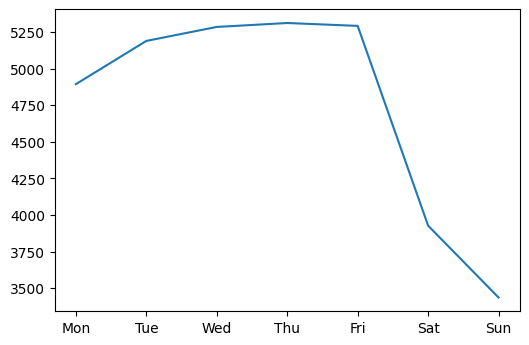

In [22]:
plt.plot(by_dayofweek['traffic_volume'])
plt.xticks(ticks=by_dayofweek['traffic_volume'].index,
          labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

Weekend traffic is generally lower than the working days.

In [24]:
traffic_day['hour'] = traffic_day['date_time'].dt.hour
working_days = traffic_day.copy()[traffic_day['dayofweek'] <= 4] 
# 4 == Friday
weekend = traffic_day.copy()[traffic_day['dayofweek'] >= 5] 
# 5 == Saturday
by_hour_business = working_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-24-22dbe974fe0d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



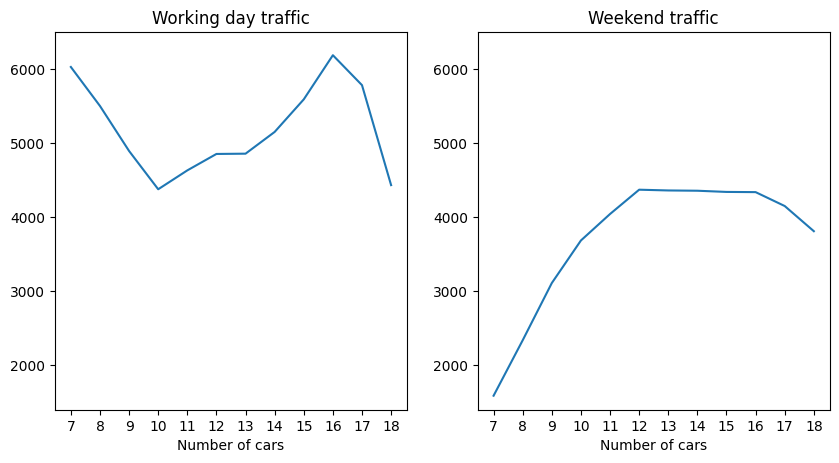

In [31]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Working day traffic')
plt.xlabel('Number of cars')
plt.xticks(ticks=by_hour_business['traffic_volume'].index)
plt.ylim([1400,6500])

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend traffic')
plt.xlabel('Number of cars')
plt.xticks(ticks=by_hour_weekend['traffic_volume'].index)
plt.ylim([1400,6500])
plt.show()

Also by hourly comparison weekend traffic is lower than working day traffic. On a working day at 0700 the traffic seems to be around the maximum (probably even before that), which then decreases and follows a somewhat linear growth right up to 1600. After the rush hour is over, the curve follows an exponential decline and at 1800 there are almost 2000 fewer cars on average.

At the weekend the morning hours are quiet (in comparison to a working day) and the volume follows a logistic growth curve which plateaus around 1200. The decline starts in the early evening hours.

During the week there is more traffic according to the time of the day, especially around rush hours. In contrast, apart from fewer cars, at the weekend heavy traffic is expected in the noon to early afternoon hours.

There is also marginally less traffic during the colder months (Dec-Feb) and holiday seasons.

# Exploring weather factors

In [32]:
traffic_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [33]:
traffic_day.corr()['traffic_volume'][['temp', 'rain_1h', 'snow_1h', 'clouds_all']]

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

In [34]:
traffic_night.corr()['traffic_volume'][['temp', 'rain_1h', 'snow_1h', 'clouds_all']]

temp          0.094004
rain_1h      -0.012972
snow_1h      -0.007453
clouds_all    0.012832
Name: traffic_volume, dtype: float64

All the weather factors have almost negligible influence on the traffic volume. The temperature has the highest correlation with the traffic volume, which indicates there may be a slight increase in the number of cars if temperatures go up. 

In [35]:
by_weather_main = traffic_day.groupby('weather_main').mean()
by_weather_description = traffic_day.groupby('weather_description').mean()

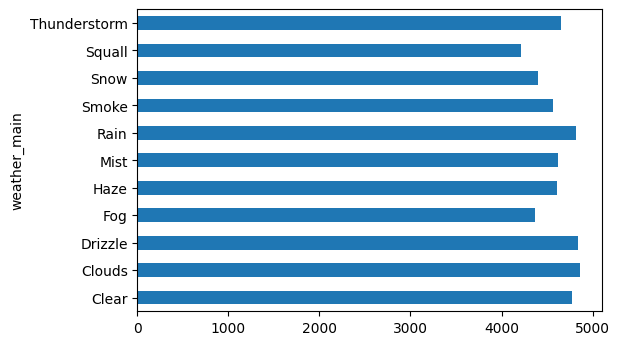

In [37]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

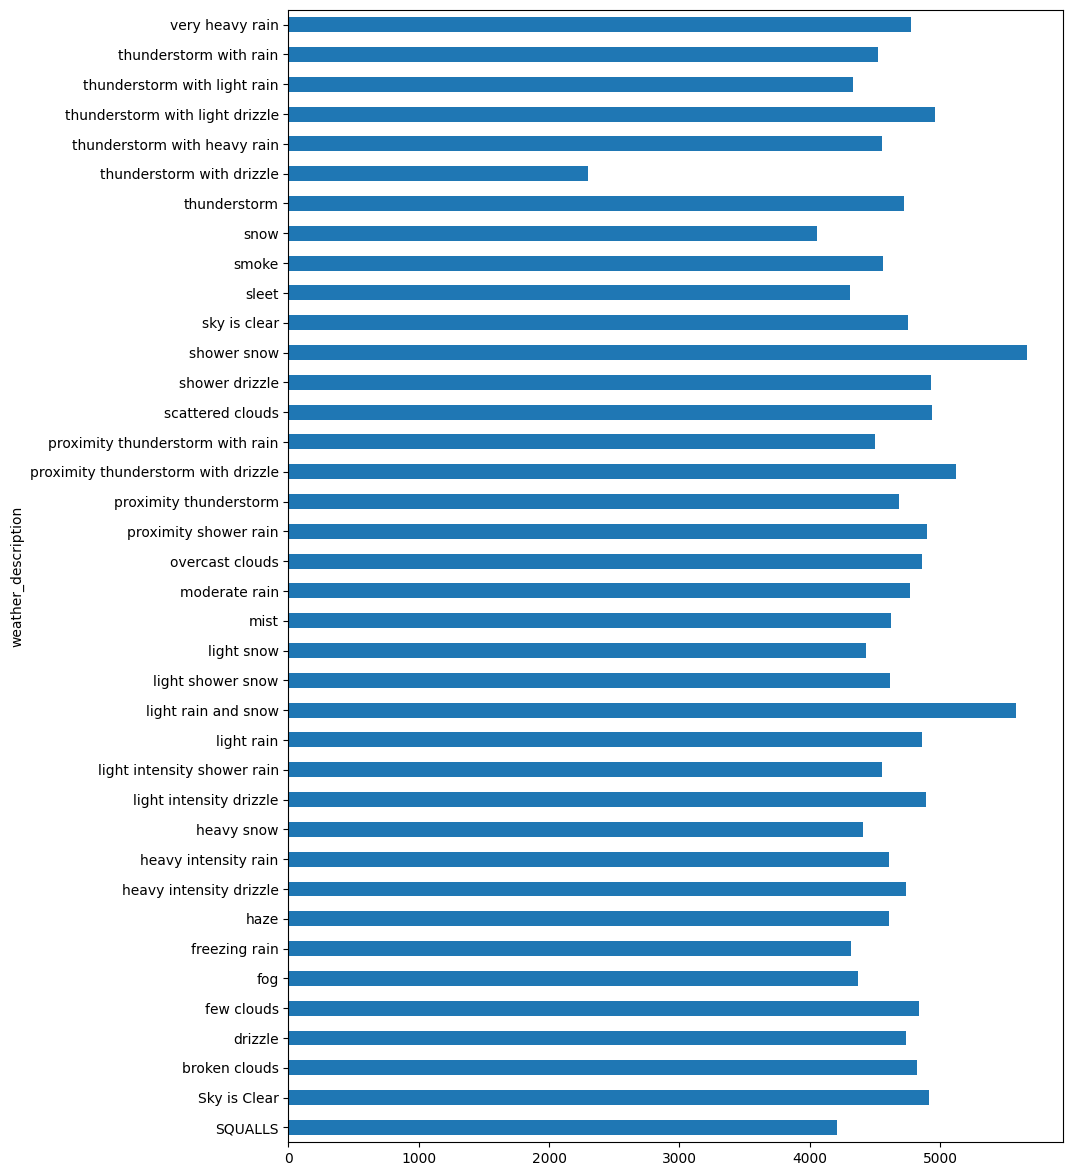

In [40]:
by_weather_description['traffic_volume'].plot.barh(figsize=(10,15))
plt.show()

Weather patterns do tend to influence the traffic volume. After analysing the above two plots, it can be said that there are fewer cars on the road during inclement weather. Particularly, the traffic volume is low when there are thunderstorms, especially thunderstorms with drizzles. There are >5000 cars on average during light rain and snow and snow showers. 

For daytime traffic, where the mean number of cars is around 4762, time of the day is most prominent heavy traffic indicator. Temperature or cloud cover do not seem to be reliable indicators, nor do amount of rain/snow recorded within an hour. Inclement weather like thunderstorms seem to drive down the traffic volume.

Nightime data...

<ipython-input-42-29b3e37ce9bd>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



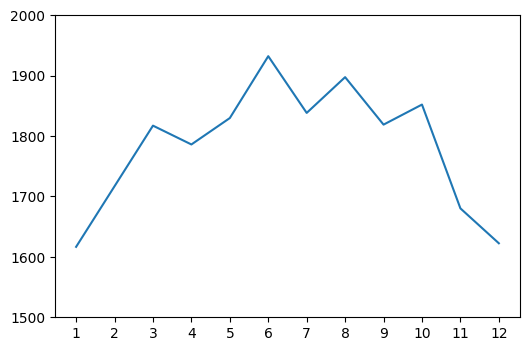

In [42]:
#group the daytime data by month and calculate the mean
traffic_night['month'] = traffic_night['date_time'].dt.month
by_month = traffic_night.groupby('month').mean()

plt.plot(by_month['traffic_volume'])
plt.xticks(ticks=by_month['traffic_volume'].index)
plt.ylim([1500,2000])
plt.show()

<ipython-input-43-92186891f5c4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



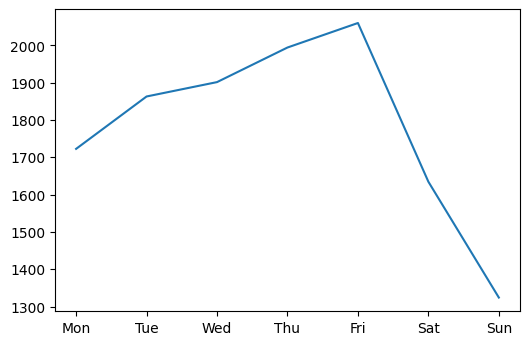

In [43]:
traffic_night['dayofweek'] = traffic_night['date_time'].dt.dayofweek
by_dayofweek = traffic_night.groupby('dayofweek').mean()

# Monday: 0, Sunday: 6
plt.plot(by_dayofweek['traffic_volume'])
plt.xticks(ticks=by_dayofweek['traffic_volume'].index,
          labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

In [108]:
traffic_night['hour'] = traffic_night['date_time'].dt.hour
working_days = traffic_night.copy()[traffic_night['dayofweek'] <= 4] 
# 4 == Friday
weekend = traffic_night.copy()[traffic_night['dayofweek'] >= 5] 
# 5 == Saturday
by_hour_business = working_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
0      651.528971
1      396.913043
2      301.982818
3      362.289835
4      832.661096
5     2701.296703
6     5365.983210
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64
hour
0     1306.414035
1      805.128333
2      611.171986
3      393.611599
4      375.420168
5      639.237232
6     1089.100334
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
Name: traffic_volume, dtype: float64


<ipython-input-108-fad1743e148a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
by_hour_business.head()

,hour,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek
0,19,283.439235,0.156652,0.000000,53.014184,3298.340426,6.460993,1.989362
1,20,282.617152,0.119718,0.000000,51.443583,2842.433004,6.515515,1.988717
2,21,281.830703,0.133628,0.000702,49.395088,2673.042807,6.422456,1.972632
3,22,280.982875,0.119544,0.000617,46.618080,2125.913104,6.437281,1.973371
4,23,280.385178,0.105409,0.000831,44.722752,1379.549728,6.470708,1.978883


In [123]:
by_hour_business = by_hour_business.reindex([19, 20, 21, 22, 23, 0,1,2,3,4,5,6])
by_hour_weekend = by_hour_weekend.reindex([19, 20, 21, 22, 23, 0,1,2,3,4,5,6])

In [131]:
by_hour_business = by_hour_business.reset_index()
by_hour_weekend = by_hour_weekend.reset_index()

In [144]:
by_hour_business.reset_index()['hour'].values

array([19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6])

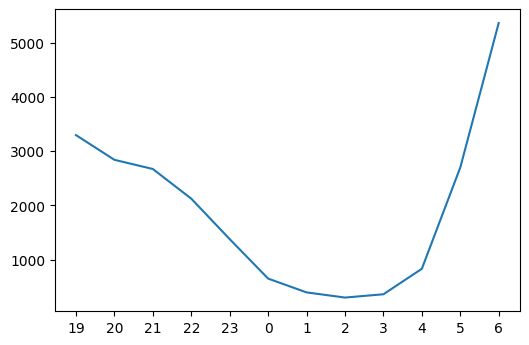

In [154]:
fig, ax = plt.subplots(1,1)
#ax = by_hour_business['traffic_volume'].plot.line()
ax.plot(by_hour_business['traffic_volume'])
ax.set_xticks(np.arange(len(by_hour_business['hour'].values)))
#ax.set_xticklabels(['19','20','21','22','23','0','1','2','3','4','5','6'])
ax.set_xticklabels(by_hour_business['hour'].values)
plt.show()

In [120]:
by_hour_business['traffic_volume'].index

Int64Index([19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6], dtype='int64', name='hour')

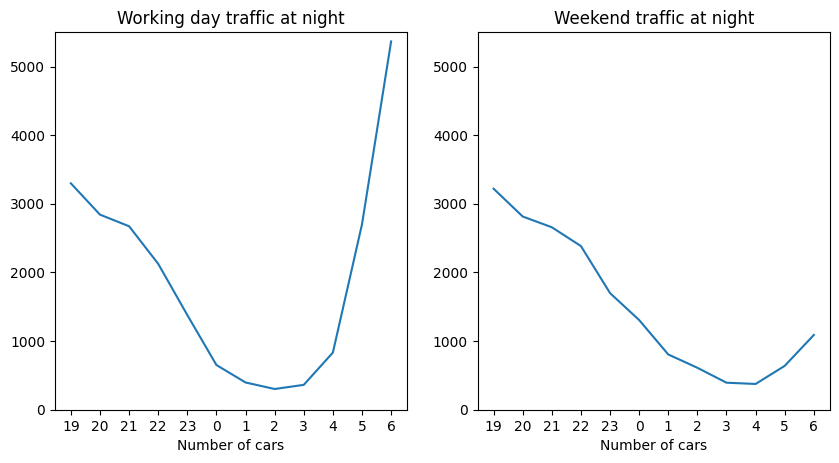

In [157]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Working day traffic at night')
plt.xlabel('Number of cars')
plt.xticks(ticks=np.arange(len(by_hour_business['hour'].values)),
           labels=['19','20','21','22','23','0','1','2','3','4','5','6'])
plt.ylim([0,5500])

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend traffic at night')
plt.xlabel('Number of cars')
plt.xticks(ticks=np.arange(len(by_hour_weekend['hour'].values)),
           labels=['19','20','21','22','23','0','1','2','3','4','5','6'])
plt.ylim([0,5500])
plt.show()

Weather for nighttime data:

In [158]:
by_weather_main = traffic_day.groupby('weather_main').mean()
by_weather_description = traffic_day.groupby('weather_description').mean()

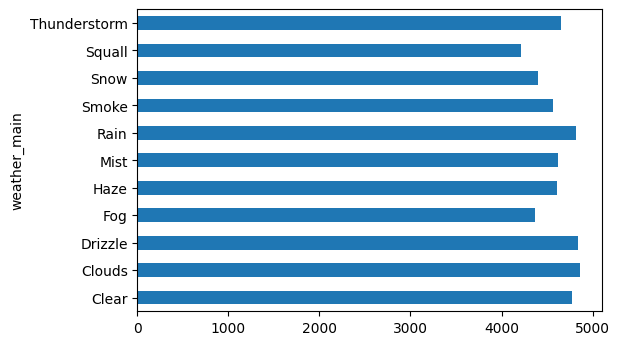

In [159]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

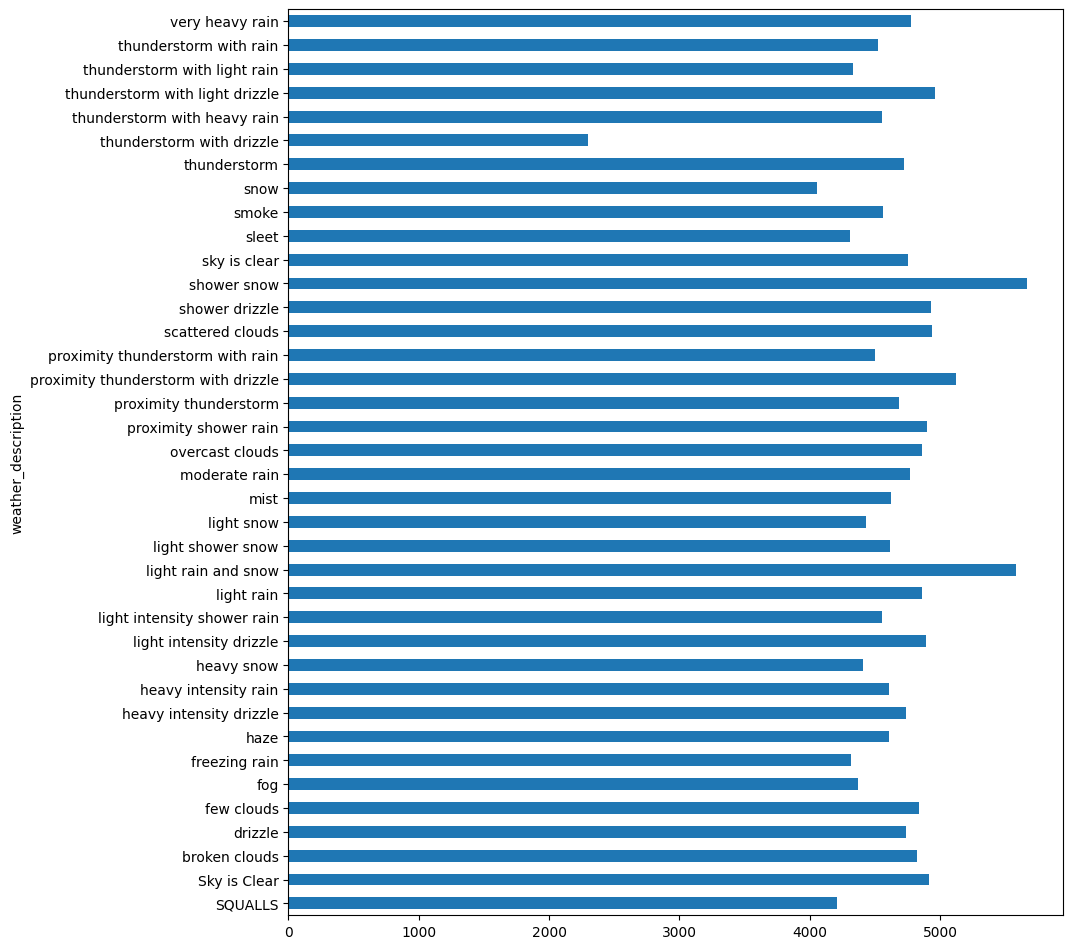

In [160]:
by_weather_description['traffic_volume'].plot.barh(figsize=(10,12))
plt.show()